# Notebook to showcase how to use the model

## CLEAR OUTPUT OF THE NOTEBOOK BEFORE COMMITING/PUSHING

The path may not work for you as they are hardcoded for a sample of the data on my machine

In [13]:
import torch
from torchvision.io import read_image
import torchvision.transforms as T
from cnn import CNN
from encoder import Encoder
import os
import csv
import re

In [14]:
FOLDER_PATH = '../../data/CROHME2016_data/data_png/subset/'

In [15]:
def sort_files(file):
    """Utility function to sort the file names according to their number"""
    match = re.match(r'\D*(?P<num>\d+)\..*', file)
    if match:
        return int(match.group('num'))   

In [16]:
#loading the images in one tensor
batch = torch.zeros((11,1,304,304))
tree = next(os.walk(FOLDER_PATH))
files = [file for file in tree[-1] if file.endswith('png')]
files.sort(key=sort_files)
for i,file in enumerate(files):
    pic = read_image(f"{FOLDER_PATH}/{file}").to(torch.float32)
    batch[i] += pic

In [17]:
#load the labels in a dictionary
labels = dict()
with open(f"{FOLDER_PATH}iso_GT.txt") as f:
    reader = csv.reader(f)
    for row in reader:
        labels[row[0]] = row[1]

In [18]:
net = CNN()
encoder = Encoder(512, 256, 27*24, 11)
out = net(batch)
o, h = encoder(out, None, True)

In [19]:
img = o.reshape((27,24, 11))[:,:,6]

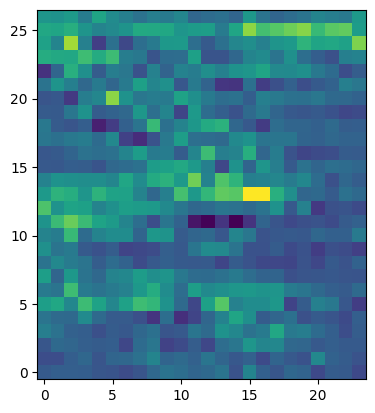

In [20]:
import matplotlib.pyplot as plt
#example of the feature grid F' for the first image
plt.imshow(img.detach().numpy(), origin='lower')

In [21]:
#encoder without the linear layer at the end
o, h = encoder(out, None, False)
o.shape

torch.Size([648, 11, 512])